## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

pd.options.display.max_columns=25

In [92]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [93]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [94]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [95]:
viz_df = data_main.set_index('bill_date')

In [96]:
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-06-01,1008901000140050014100,2000,10518 BELLAIRE,T,73232.11,905421.0
2012-05-01,1008901000140050014100,2000,10518 BELLAIRE,T,68463.46,824107.0
2012-04-01,1008901000140050014100,2000,10518 BELLAIRE,T,80847.87,977744.0
2012-03-01,1008901000140050014100,2000,10518 BELLAIRE,T,74373.93,876838.0
2012-02-01,1008901000140050014100,2000,10518 BELLAIRE,T,74080.27,872898.0


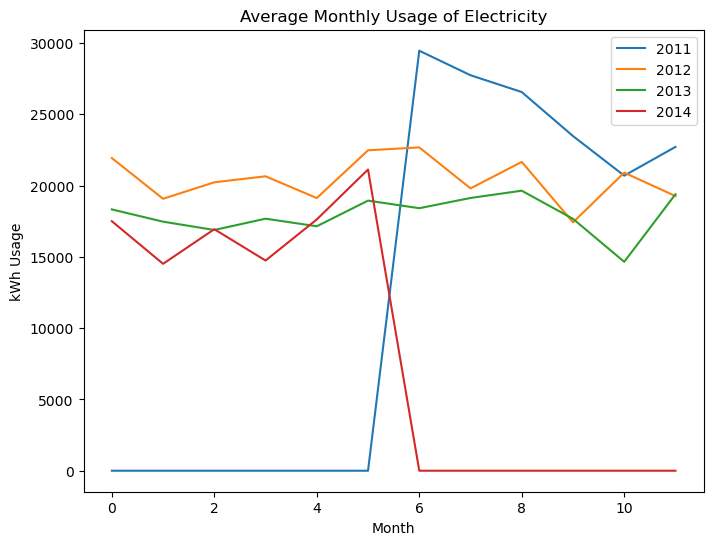

In [100]:
viz_df_2 = data_main.groupby('bill_date').agg({'kwh_usage':'mean'}).reset_index()

temp_list = [0 for _ in range(12)]

date_dict = {
    '2011': temp_list.copy(),
    '2012': temp_list.copy(),
    '2013': temp_list.copy(),
    '2014': temp_list.copy(),
}

for date, usage in viz_df_2.values:
    date_dict[str(date.year)][date.month-1] = usage

usage_2011 = date_dict['2011']
usage_2012 = date_dict['2012']
usage_2013 = date_dict['2013']
usage_2014 = date_dict['2014']


plt.figure(figsize=(8,6))
plt.plot(range(12), usage_2011, label='2011')
plt.plot(range(12), usage_2012, label='2012')
plt.plot(range(12), usage_2013, label='2013')
plt.plot(range(12), usage_2014, label='2014')
plt.xlabel('Month')
plt.ylabel('kWh Usage')
plt.title('Average Monthly Usage of Electricity')
plt.legend()
plt.show()

In 2011 the first 6 months and  in 2014 the last 6 months have the value 0. This is due to the fact that the data has been collected for each year from July of the current year to June of the next year (Financial Year).

Similar to the previous plot, we can see the same trend. But one thing to be observed is that the trend across all these years has remained relatively same across the months even in these 4 years.